<a href="https://colab.research.google.com/github/amarnathsujith/ucek/blob/master/Preliminary_Analysis_Of_Skin_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
dataset='/content/drive/MyDrive/archive (97).zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The Dataset Is Extracted')

The Dataset Is Extracted


In [ ]:
medium_files=os.listdir('/content/dataset/Medium')
mild_files=os.listdir('/content/dataset/Mild')
severe_files=os.listdir('/content/dataset/Severe')

In [ ]:
print(medium_files)
print(mild_files)
print(severe_files)

['squamous-cell-carcinoma-leg-1.jpg', 'lymphomatoid-papulosis-3.jpg', 'drug-eruption-photosensitivity-9.jpg', 'benign-familial-chronic-pemphigus-14.jpg', 'seborrheic-keratoses-ruff-103.jpg', 'acne-cystic-10.jpg', 'acne-cystic-95.jpg', 'rhus-dermatitis-28.jpg', 'acne-cystic-61.jpg', 'nevus-spilus-14.jpg', 'acne-cystic-109.jpg', 'fixed-drug-eruption-35.jpg', 'actinic-keratosis-5FU-9.jpg', 'acne-excoriated-4.jpg', 'drug-eruptions-99.jpg', 'necrobiosis-lipoidica-53.jpg', '07RosaceaK02161.jpg', 'acne-cystic-6.jpg', 'hidradenitis-suppurativa-60.jpg', '07RosaceaK02162.jpg', 'melanocytic-nevi-63.jpg', 'genital-warts-89.jpg', 'acne-cystic-36.jpg', '05atopic1107054.jpg', 'Dyshidrosis-22.jpg', 'dermatitis-herpetiformis-34.jpg', 'pityriasis-rosea-157.jpg', 'allergic-contact-dermatitis-125.jpg', 'Axillary-Granular-Parakeratosis-5.jpg', 'fixed-drug-eruption-57.jpg', 'diaper-rash-1.jpg', 'rhus-dermatitis-50.jpg', '20SebNevus0216.jpg', 'acne-excoriated-24.jpg', '05AtopicDerm0419042.jpg', 'eczema-subac

In [ ]:
print(medium_files[0:5])
print(medium_files[-5])


['squamous-cell-carcinoma-leg-1.jpg', 'lymphomatoid-papulosis-3.jpg', 'drug-eruption-photosensitivity-9.jpg', 'benign-familial-chronic-pemphigus-14.jpg', 'seborrheic-keratoses-ruff-103.jpg']
basal-cell-carcinoma-face-18.jpg


In [ ]:
print(mild_files[0:5])
print(mild_files[-5])

['allergic-contact-dermatitis-18.jpg', 'warts-immunocompromised-4.jpg', 'schamberg-disease-12.jpg', 'eczema-nummular-94.jpg', 'actinic-cheilitis-sq-cell-lip-2.jpg']
viral-exanthems-106.jpg


In [ ]:
print(severe_files[0:5])
print(severe_files[-5])

['basal-cell-carcinoma-lip-8.jpg', 'actinic-keratosis-5FU-62.jpg', 'vasculitis-96.jpg', 'eczema-subacute-69.jpg', 'atypical-nevi-24.jpg']
pyoderma-gangrenosum-13.jpg


In [ ]:
print("Number of Medium files",len(medium_files))
print("Number of Mild files",len(mild_files))
print("Number of Severe files",len(severe_files))

Number of Medium files 262
Number of Mild files 342
Number of Severe files 319


In [ ]:
medium_labels=[0]*262
mild_labels=[1]*342
severe_labels=[2]*319

In [ ]:
print(medium_labels)
print(mild_labels)
print(severe_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
labels=medium_labels+mild_labels+severe_labels

In [ ]:
print(len(labels))
print(labels[0:5])
print(labels[-5])


923
[0, 0, 0, 0, 0]
2


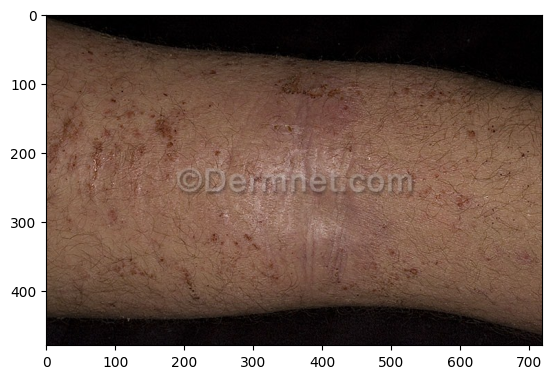

In [ ]:
img=mpimg.imread('/content/dataset/Medium/05atopic1107052.jpg')
imgplt=plt.imshow(img)
plt.show()

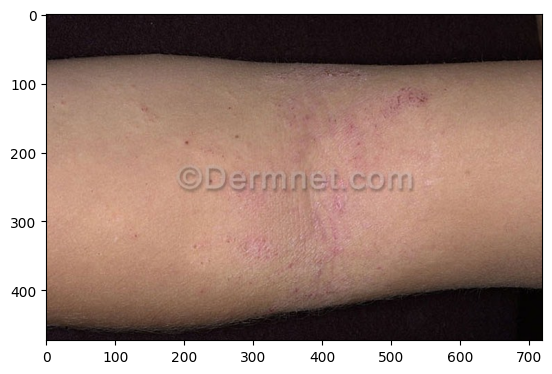

In [ ]:
img=mpimg.imread('/content/dataset/Mild/05Atopic2.jpg')
imgplt=plt.imshow(img)
plt.show()

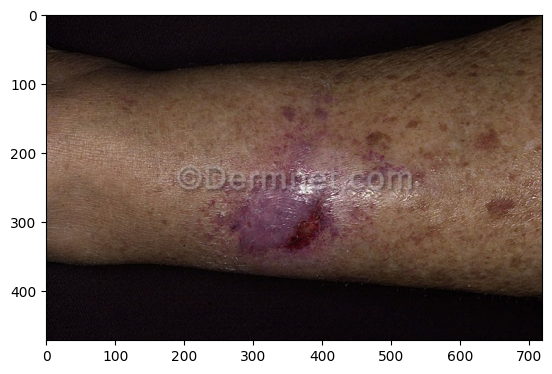

In [ ]:
img=mpimg.imread('/content/dataset/Severe/biting-insects-18.jpg')
imgplt=plt.imshow(img)
plt.show()

In [ ]:
medium_image_path='/content/dataset/Medium/'
data=[]

for img_file in medium_files:
  image=Image.open(medium_image_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

mild_image_path='/content/dataset/Mild/'


for img_file in mild_files:
  image=Image.open(mild_image_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

severe_image_path='/content/dataset/Severe/'


for img_file in severe_files:
  image=Image.open(severe_image_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


In [ ]:
data[0]

array([[[ 97,  98, 103],
        [ 98,  99, 104],
        [ 98,  99, 104],
        ...,
        [ 88,  88,  94],
        [ 80,  82,  87],
        [ 79,  83,  88]],

       [[101, 102, 107],
        [ 99, 100, 105],
        [101, 102, 107],
        ...,
        [ 85,  85,  90],
        [ 81,  82,  87],
        [ 75,  78,  83]],

       [[102, 104, 109],
        [ 99, 102, 107],
        [107, 110, 115],
        ...,
        [ 84,  86,  91],
        [ 85,  87,  92],
        [ 84,  85,  90]],

       ...,

       [[137, 134, 142],
        [136, 132, 140],
        [136, 132, 140],
        ...,
        [134, 130, 137],
        [133, 130, 137],
        [143, 140, 147]],

       [[141, 138, 148],
        [144, 139, 149],
        [143, 138, 147],
        ...,
        [144, 143, 149],
        [138, 137, 143],
        [136, 133, 140]],

       [[151, 148, 157],
        [147, 143, 153],
        [151, 145, 155],
        ...,
        [141, 140, 146],
        [137, 135, 141],
        [138, 135, 142]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
x=np.array(data)
y=np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(923, 128, 128, 3) (738, 128, 128, 3) (185, 128, 128, 3)


In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
x_train_scaled[0]

array([[[0.03137255, 0.03137255, 0.03921569],
        [0.02745098, 0.02745098, 0.03529412],
        [0.03921569, 0.03921569, 0.04705882],
        ...,
        [0.0627451 , 0.05490196, 0.0745098 ],
        [0.05882353, 0.05490196, 0.0745098 ],
        [0.0627451 , 0.0627451 , 0.08235294]],

       [[0.03529412, 0.03529412, 0.04313725],
        [0.03529412, 0.03529412, 0.04313725],
        [0.03137255, 0.03137255, 0.03921569],
        ...,
        [0.07058824, 0.06666667, 0.08627451],
        [0.05882353, 0.05490196, 0.0745098 ],
        [0.0627451 , 0.05882353, 0.07843137]],

       [[0.03137255, 0.03137255, 0.03921569],
        [0.02745098, 0.02745098, 0.03529412],
        [0.03529412, 0.03529412, 0.04313725],
        ...,
        [0.0745098 , 0.06666667, 0.08627451],
        [0.07058824, 0.06666667, 0.08627451],
        [0.07058824, 0.07058824, 0.09019608]],

       ...,

       [[0.05490196, 0.05098039, 0.07058824],
        [0.05882353, 0.05882353, 0.07058824],
        [0.06666667, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,30),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,3)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=0)

Path of the image to be predicted:/content/dataset/Medium/05atopic1107052.jpg


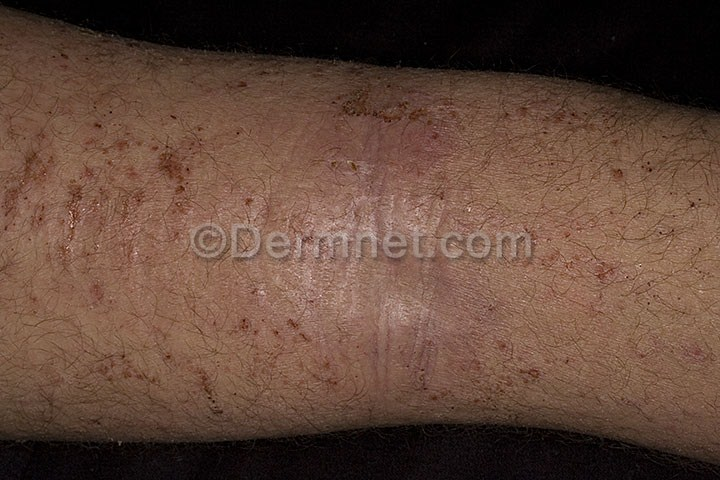

1/1 [==============================] - 0s 119ms/step
[[0.5653563 0.5074662]]
0
The disease shown is MEDIUM


In [ ]:
input_image_path=input('Path of the image to be predicted:')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label ==0:
  print('The disease shown is MEDIUM')
elif input_pred_label==1:
  print('The disease shown is MILD')
else:
    print('The disease shown is SEVERE')